# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [218]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [219]:
df = pd.read_csv('product_sales.csv')
display(df.head())
df.info()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [220]:
df.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [221]:
print('The missing values represent the '+ str((1074/15000)*100) + '% of values')

The missing values represent the 7.16% of values


In [222]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


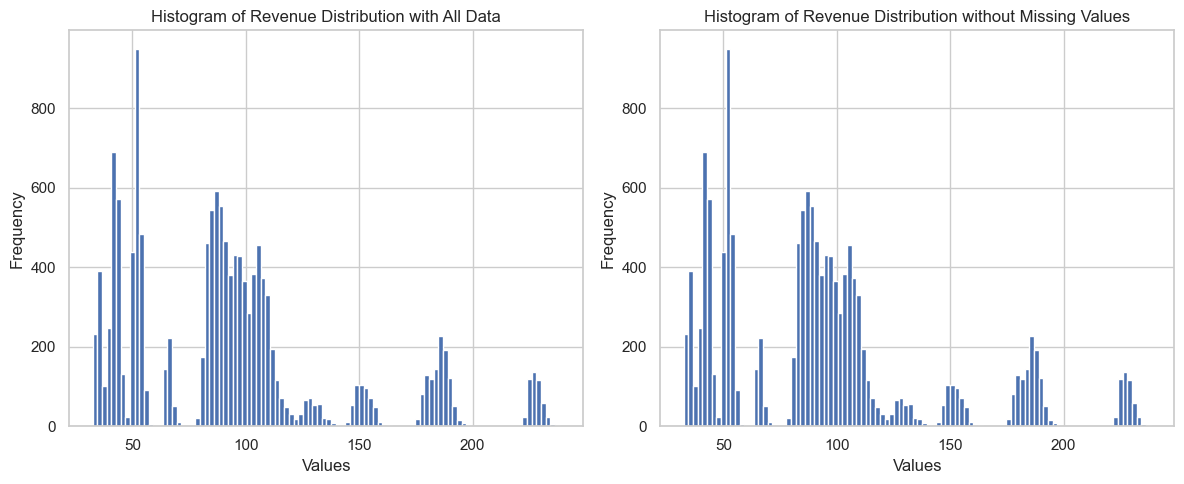

In [223]:
#drop missing values
df_sin_nan = df.dropna()

# Create two subplots in one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Histogram of all 'revenue' data
axs[0].hist(df['revenue'], bins=100)
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Revenue Distribution with All Data')

# Second subplot: Histogram of 'revenue' without missing values
axs[1].hist(df_sin_nan['revenue'], bins=100)
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Revenue Distribution without Missing Values')

# Adjust the space between subplots
plt.tight_layout()



In [224]:
'''we proceed to delete the rows with missing values from the database, because the distribution does not change'''

'we proceed to delete the rows with missing values from the database, because the distribution does not change'

In [225]:
df_sin_nan['sales_method'].unique()

array(['Email + Call', 'Call', 'Email', 'em + call', 'email'],
      dtype=object)

In [226]:
df_sin_nan['sales_method'] = df_sin_nan['sales_method'].replace('em + call','Email + Call')
df_sin_nan['sales_method'] = df_sin_nan['sales_method'].replace('email','Email + Call')

In [227]:
df_sin_nan['sales_method'].unique()

array(['Email + Call', 'Call', 'Email'], dtype=object)

In [228]:
df_final = df_sin_nan
df_final.info()
df_final.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13926.000000,13926.000000,13926.000000,13926.000000,13926.000000
mean,3.078271,10.040069,93.934943,4.978960,24.947006
std,1.650650,1.789690,47.435312,5.047828,3.491491
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,1.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,4.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,37.000000


## Data Validation
The dataset contains ****15000** rows and 8 columns** before cleaning and validataion. I have check that all the columns meet the requirements specified in the dataset table:
- week: integer values represented between 1 and 6. No cleaning is needed
- sales_method: The description had 3 unique values, but the database had 5 values. It was necessary to correct the misspelled names
- customer_id: Universally unique identifier. Same as the description. No cleaning is needed.
- nb_sold: Integer numeric values, same as the description. No cleaning is needed.
- revenue: 1074 missing values. A deletion of rows was made since it does not imply any significant change in the statistical summary.
- years_as_customer:Integer numeric values without missing values, same as the description. No cleaning is needed.
- nb_site_visits: Integer numeric values without missing values, same as the description. No cleaning is needed.  
- state: 50 unique values, same as the description. No cleaning is needed.

After the data validation, the dataset contains **13926 rows and 8 columns** without missing values.

## Exploratory Analysis

### 1. How many customers were there for each approach?

Out of the 13,926 customers in the database, the sales method that attracted the largest customers was email, followed by phone calls, and lastly, a combination of email and phone calls.

In [229]:
# Count the occurrences of each customer_id
count = df_final['customer_id'].value_counts()

# Filter values that occur more than once
repeated = count[count > 1]

print("Repeated values and their frequencies:")
print(repeated)

Repeated values and their frequencies:
Series([], Name: customer_id, dtype: int64)


In [230]:
how_many = df_final['sales_method'].value_counts().reset_index()
how_many

,index,sales_method
0,Email,6915
1,Call,4781
2,Email + Call,2230


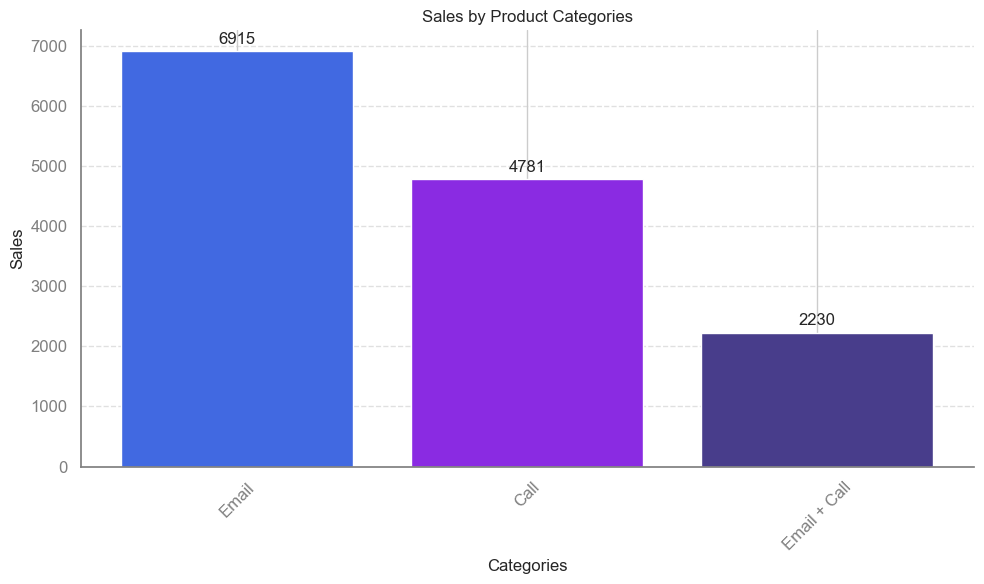

In [231]:
sales = how_many['sales_method']
colors = ['royalblue', 'blueviolet', 'darkslateblue']
labels = [str(sale) for sale in sales]  # Convert sales values to strings

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(how_many['index'], sales, color=colors)

# Data labels on the bars
for bar, label in zip(bars, labels):
    height = bar.get_height()
    ax.annotate(label,
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Label offset
                textcoords="offset points",
                ha='center', va='bottom')

# Add gridlines
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Labels and title
plt.xlabel('Categories')
plt.ylabel('Sales')
plt.title('Sales by Product Categories')

# Customize colors and style
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

# Show the chart
plt.xticks(rotation=45, fontsize=12)  # Rotate labels and adjust font size
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


###  2. What does the spread of the revenue look like overall? And for each method?

From the overall distribution plot, it can be observed that the majority of sales made in the last 6 weeks are less than 189.6. Values greater than this amount may be considered outliers.

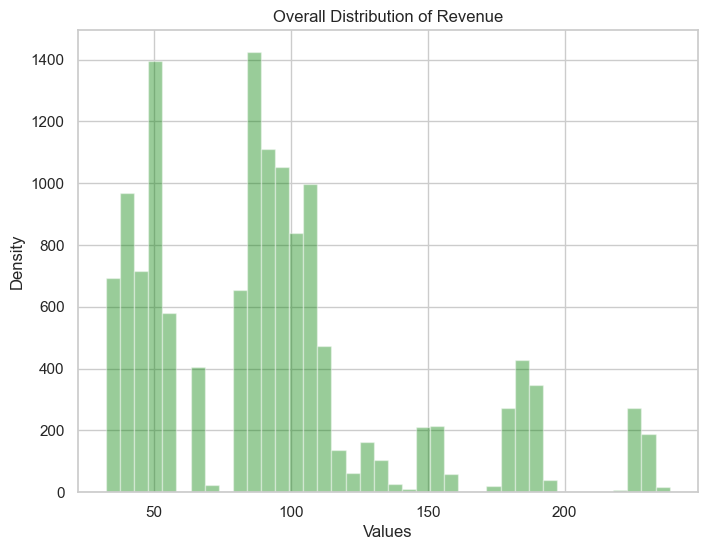

In [232]:
# Create the distribution plot
sns.set(style="whitegrid")  # Set a background style
plt.figure(figsize=(8, 6))  # Figure size (optional)
sns.distplot(df_final['revenue'], hist=True, kde=False, color='green', bins=40)  # Create the distribution plot

# Labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Overall Distribution of Revenue')

# Show the plot
plt.show()

In [233]:
df_final['revenue'].describe()

count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64

<AxesSubplot: xlabel='revenue'>

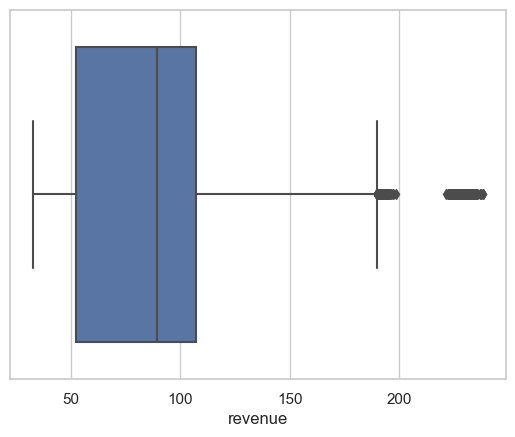

In [234]:
# box plot overall distribution
sns.boxplot(x='revenue', data=df_final)

In [235]:

# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = np.percentile(df_final['revenue'], 25)  # First quartile (25%)
Q3 = np.percentile(df_final['revenue'], 75)  # Third quartile (75%)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the upper limit of outliers (LSO) and the lower limit of outliers (LIO)
LSO = Q3 + 1.5 * IQR

print("Upper Limit of Outliers (LSO):", LSO)


Upper Limit of Outliers (LSO): 189.61374999999998


In the other hand, the distribution across sales methods is as follows: For Email, which had the highest number of customers, most of the sales fall between 87.8 and 105.2. For phone calls, which ranked second, the distribution is between 41.5 and 52.7. Finally, for Email + Call, ranking third in the number of customers, it is distributed between 155.7 and 191.1.

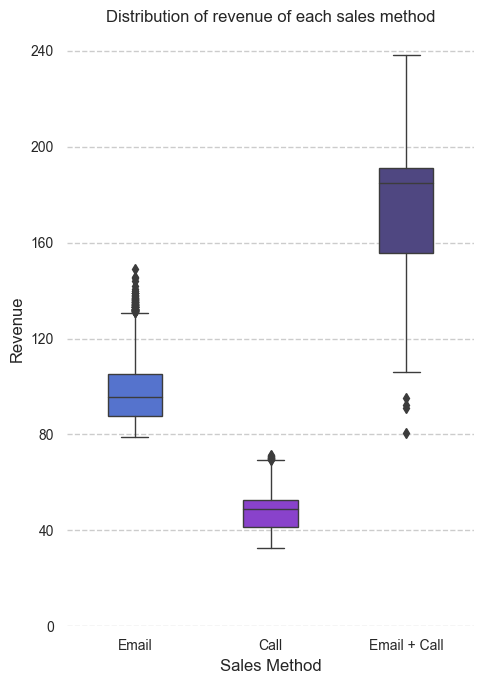

In [236]:
# Create the box plot
plt.figure(figsize=(5,7))  # Figure size (optional)
sns.boxplot(x='sales_method', y='revenue', data=df_final, palette={'Email': 'royalblue', 'Call': 'blueviolet', 'Email + Call': 'darkslateblue'},
            width=0.4, notch=False, linewidth=1, fliersize=5, order=['Email', 'Call', 'Email + Call'])

# Box style
sns.set(style="whitegrid")
sns.despine(left=True, bottom=True)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=1)

# Labels and title
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('Distribution of revenue of each sales method')

# Show the plot with more values on the y-axis
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yticks(range(0, 250, 40))  # Adjust y-axis values as needed
plt.tight_layout()
plt.show()

# Show the plot
plt.show()

In [237]:
email = df_final[df_final['sales_method'] == 'Email']['revenue']
email.describe()

count    6915.000000
mean       97.126645
std        11.211006
min        78.830000
25%        87.880000
50%        95.580000
75%       105.165000
max       148.970000
Name: revenue, dtype: float64

In [238]:
call = df_final[df_final['sales_method'] == 'Call']['revenue']
call.describe()

count    4781.000000
mean       47.597467
std         8.609899
min        32.540000
25%        41.470000
50%        49.070000
75%        52.680000
max        71.360000
Name: revenue, dtype: float64

In [239]:
emcall = df_final[df_final['sales_method'] == 'Email + Call']['revenue']
emcall.describe()

count    2230.000000
mean      183.382857
std        29.435622
min        80.720000
25%       155.720000
50%       184.710000
75%       191.067500
max       238.320000
Name: revenue, dtype: float64

### 3. Was there any difference in revenue over time for each of the methods?

In [240]:
sales1 = df_final[df_final['sales_method']=='Email']
sales1 = sales1[['revenue','week','sales_method']]
sales1 = sales1.groupby('week').sum()
sales1.reset_index()
sales2 = df_final[df_final['sales_method']=='Call']
sales2 = sales2[['revenue','week','sales_method']]
sales2 = sales2.groupby('week').sum()
sales2.reset_index()
sales3 = df_final[df_final['sales_method']=='Email + Call']
sales3 = sales3[['revenue','week','sales_method']]
sales3 = sales3.groupby('week').sum()
sales3.reset_index()

,week,revenue
0,1,17061.44
1,2,26376.23
2,3,48920.21
3,4,78512.17
4,5,126921.65
5,6,111152.07


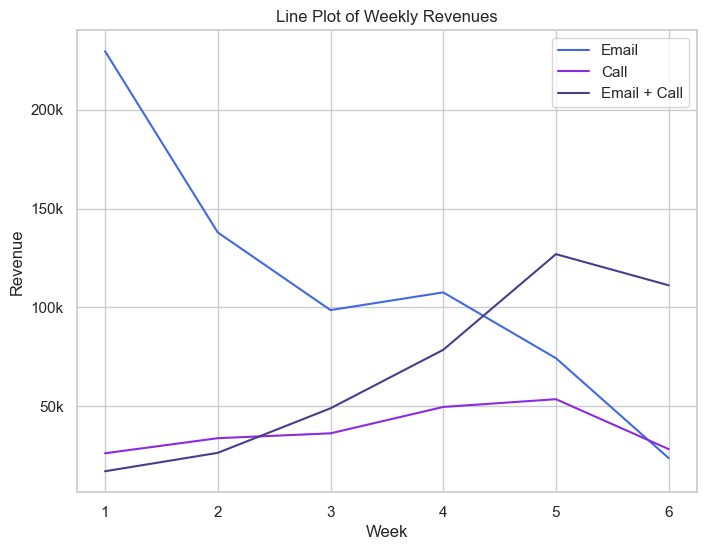

In [241]:
colors = ['royalblue', 'blueviolet', 'darkslateblue']

# Create a line plot for each DataFrame with labels
plt.figure(figsize=(8, 6))
sns.lineplot(x=sales1.index, y=sales1['revenue'], color=colors[0], label='Email')
sns.lineplot(x=sales2.index, y=sales2['revenue'], color=colors[1], label='Call')
sns.lineplot(x=sales3.index, y=sales3['revenue'], color=colors[2], label='Email + Call')

# Labels and title
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Line Plot of Weekly Revenues')

# Customize the y-axis ticks
plt.yticks([50000, 100000, 150000, 200000], ['50k', '100k', '150k', '200k'])

# Add a single legend
plt.legend(loc='upper right')

# Show the plot
plt.show()


The graph above shows that during the first 4 weeks, the email generates sales of around 100,000 or more, which after this week starts to decline. On the other hand, calls maintain an average sales of 38,000 during the first 6 weeks, with a somewhat constant behavior during this period. Finally, the email + call method starts with few sales in the first weeks, but then has an increasing behavior generating sales over 100,000.

In [242]:
sales2.describe()

,revenue
count,6.000000
mean,37927.248333
std,11235.571460
min,26159.180000
25%,29637.695000
50%,35019.645000
75%,46257.310000
max,53518.110000


### 4. Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar



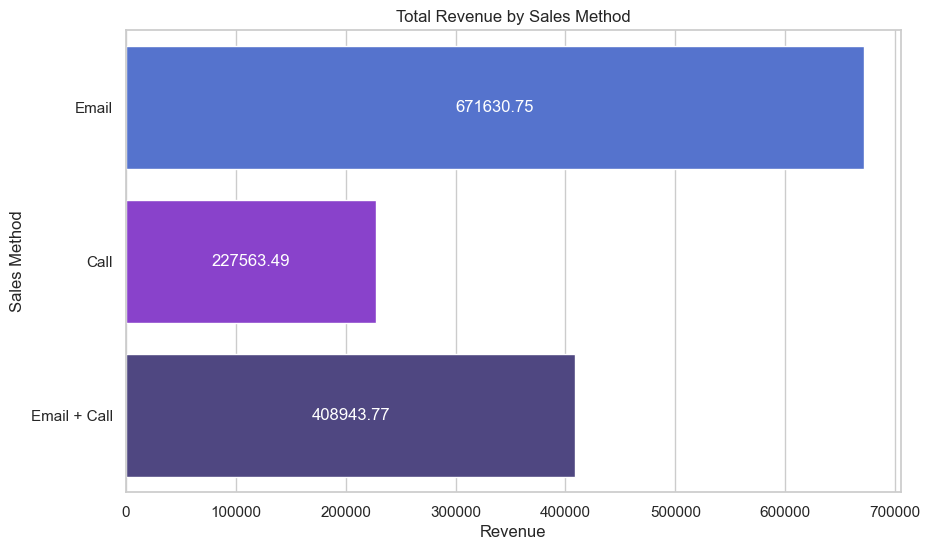

'Ventas totales: 1308138.01'

In [243]:

sales = df_final.groupby('sales_method')['revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))  # Figure size (optional)

# Define the desired order of the bars
order = ['Email','Call', 'Email + Call' ]

# Create a bar chart
ax = sns.barplot(x='revenue', y='sales_method', data=sales, order=order, palette=colors)

total_revenue = sales['revenue'].sum()

# add the values to chart
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width:.2f}', (x + width / 2, y + height / 2),
                ha='center', va='center', fontsize=12, color='white')

    
    
# Labels and title
plt.xlabel('Revenue')
plt.ylabel('Sales Method')
plt.title('Total Revenue by Sales Method')

# Show the plot
plt.show()
display('Ventas totales: ' + str(sales['revenue'].sum()))

Based on the above graph, and taking into account the time it takes a worker to employ a sales method, I would focus more efforts on both the email method and the email + call method, since they generate more revenue and do not take as much time

## Definition of a metric for the business to monitor 

Business wants to know what went well in the different sales methods and customers, I recommend using the **Profits realized in the first 6 weeks of launching a product to market by different method** (the last graph shown). 

If these numbers are exceeded, it indicates that it is a good sign of the goal achieved.

## Recommendation

If I had to eliminate one sales method, in order to use that time as effort for another method, I would eliminate calling, as it takes about 30 minutes per customer and the data showed that it was the lowest earning compared to the other two methods. 


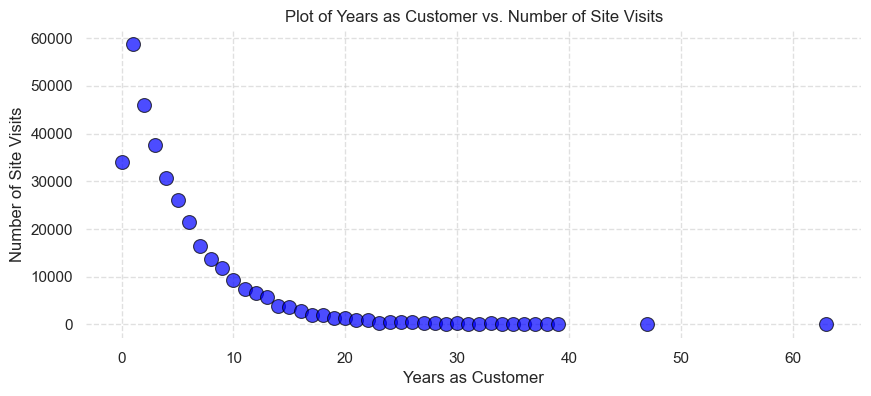

In [244]:
year_cx = df_final.groupby('years_as_customer')['nb_site_visits'].sum().reset_index()
plt.figure(figsize=(10, 4))  # Figure size (optional)

# Create a scatter plot with custom style
sns.scatterplot(x='years_as_customer', y='nb_site_visits', data=year_cx, color='blue', alpha=0.7, s=100, edgecolor='black')

# Labels and title
plt.xlabel('Years as Customer')
plt.ylabel('Number of Site Visits')
plt.title('Plot of Years as Customer vs. Number of Site Visits')

# Set style to whitegrid
sns.set(style="whitegrid")
sns.despine(left=True, bottom=True)

# Add grid lines
plt.grid(axis='both', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In addition, knowing that the other two methods usually use email, I would also invest time in keeping the website updated as it allows customers to keep abreast of new products and even attract new customers by facilitating the work of workers.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation